# PN2V Training
Here we will use the estimated noise model (from the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```) and train a PN2V network on single noisy images.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

from ppn2v.unet.model import UNet
from ppn2v import utils, training
from ppn2v.noise_models import gaussianMixtureNoiseModel, histNoiseModel

from tifffile import imread
import os
import urllib
import zipfile
import torch
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

Load the data that needs to be denoised. It is expected that you have downloaded the datasets and created a noise model (GMM- and  histogram- based) using the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```). Ensure that for `Mouse Actin`, the data to be denoised is named ```sample_attempt2.tif``` and not the diaphragm data. 

In [2]:
path='../../../data/Mouse actin/'
# Load the training data
data=imread(path+'sample_attempt2.tif')
dataName = 'mouseactin'

Uncomment the pertinent `nameNoiseModel` to choose the noiseModel of interest

In [3]:
 nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'calibration'
# nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'calibration'
# nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'bootstrap'
# nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'bootstrap'


In [4]:
namePN2VModel=nameNoiseModel
if('HistNoiseModel' in namePN2VModel):
    histogram = np.load(path+nameNoiseModel+'.npy') 
    noiseModel= histNoiseModel.NoiseModel(histogram, device=device)
elif('GMMNoiseModel' in namePN2VModel):
    params= np.load(path+nameNoiseModel+'.npz')
    noiseModel = gaussianMixtureNoiseModel.GaussianMixtureNoiseModel(params = params, device = device)
    

### Create the Network and Train it
This can take a while.

In [5]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()
np.random.shuffle(my_train_data)
np.random.shuffle(my_val_data)

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix=namePN2VModel, directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 4.051128673553467+-(2SEM)0.2547299701589501      
Epoch 1 finished      
avg. loss: 3.604323172569275+-(2SEM)0.17206938554563317      
Epoch 2 finished      
avg. loss: 3.531694436073303+-(2SEM)0.18262183563016432      
Epoch 3 finished      
avg. loss: 3.5755465149879457+-(2SEM)0.21112149981447142      
Epoch 4 finished      
avg. loss: 3.6140146970748903+-(2SEM)0.18144096894860073      
Epoch 5 finished      
avg. loss: 3.365917408466339+-(2SEM)0.16121127305963395      
Epoch 6 finished      
avg. loss: 3.5450349926948546+-(2SEM)0.14154423226842755      
Epoch 7 finished      
avg. loss: 3.399729371070862+-(2SEM)0.14587281339253408      
Epoch 8 finished      
avg. loss: 3.375402009487152+-(2SEM)0.1818391569216549      
Epoch 9 finished      
avg. loss: 3.303739774227142+-(2SEM)0.145504022558152      
Epoch 10 finished      
avg. loss: 3.447651767730713+-(2SEM)0.15163282192276395      
Epoch 11 finished      
avg. loss: 3.2779831767082213+-(2SEM)0.14

Epoch 92 finished      
avg. loss: 3.3888360142707823+-(2SEM)0.1671991633826765      
Epoch 93 finished      
avg. loss: 3.511154294013977+-(2SEM)0.16685071947592262      
Epoch 94 finished      
avg. loss: 3.446336770057678+-(2SEM)0.13226374798587878      
Epoch 95 finished      
avg. loss: 3.4222679018974302+-(2SEM)0.1904472639680154      
Epoch 96 finished      
avg. loss: 3.316783833503723+-(2SEM)0.15172365938611107      
Epoch    97: reducing learning rate of group 0 to 1.5625e-05.
Epoch 97 finished      
avg. loss: 3.436566710472107+-(2SEM)0.16474118332352933      
Epoch 98 finished      
avg. loss: 3.504527723789215+-(2SEM)0.16027243909758254      
Epoch 99 finished      
avg. loss: 3.3723695039749146+-(2SEM)0.11307736203048213      
Epoch 100 finished      
avg. loss: 3.4020641326904295+-(2SEM)0.15326443831711037      
Epoch 101 finished      
avg. loss: 3.3599815011024474+-(2SEM)0.16910907096374925      
Epoch 102 finished      
avg. loss: 3.4509156823158262+-(2SEM)0.183559849

avg. loss: 3.549402344226837+-(2SEM)0.1588107036277552      
Epoch 182 finished      
avg. loss: 3.3703078627586365+-(2SEM)0.16576984712549875      
Epoch 183 finished      
avg. loss: 3.544865369796753+-(2SEM)0.15272021282081644      
Epoch   184: reducing learning rate of group 0 to 1.2207e-07.
Epoch 184 finished      
avg. loss: 3.2678040981292726+-(2SEM)0.14027120619277492      
Epoch 185 finished      
avg. loss: 3.4787610530853272+-(2SEM)0.16287613657780595      
Epoch 186 finished      
avg. loss: 3.464769434928894+-(2SEM)0.187354025502539      
Epoch 187 finished      
avg. loss: 3.4366858124732973+-(2SEM)0.16668569133470326      
Epoch 188 finished      
avg. loss: 3.409744310379028+-(2SEM)0.1896976501847503      
Epoch 189 finished      
avg. loss: 3.3913928151130674+-(2SEM)0.1474025995179484      
Epoch 190 finished      
avg. loss: 3.2373018860816956+-(2SEM)0.10541397584775904      
Epoch 191 finished      
avg. loss: 3.206303334236145+-(2SEM)0.13038900950375484      
Epoch

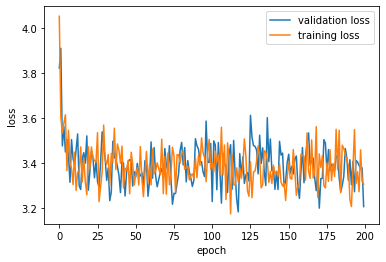

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()